In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize' : (12, 5)}, font='verdana')
plt.style.use('dark_background')
df_customers  = pd.read_csv('https://drive.google.com/uc?id=1P7oRu4FiJM2Vp8pd0YnmDybb-k2NYZuM') 
df_orders     = pd.read_csv('https://drive.google.com/uc?id=1YImQmfaKE5hM-k1jhczuGhj4jycc5Rmh')
df_items      = pd.read_csv('https://drive.google.com/uc?id=1q_mVm-lkLQU1fj0CSCY-j8ru5lzauFNb')

In [2]:
df_customers.head(1)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP


In [3]:
df_orders.head(1)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00


In [4]:
df_items.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29


Посмотрим: чем отличаются customer_id и customer_unique_id

In [5]:
df_customers.groupby('customer_unique_id')\
            .customer_zip_code_prefix\
            .count()\
            .sort_values(ascending = False)

customer_unique_id
8d50f5eadf50201ccdcedfb9e2ac8455    17
3e43e6105506432c953e165fb2acf44c     9
1b6c7548a2a1f9037c1fd3ddfed95f33     7
6469f99c1f9dfae7733b25662e7f1782     7
ca77025e7201e3b30c44b472ff346268     7
                                    ..
ffe7752edcf14b5819058b1948e02f3a     1
ffe780a8995715d9560ca10f3351710f     1
ffe8f2fc0cee48f79934bd2c506fafc0     1
ffe9102bb78a76921ba0ff3c4659616a     1
ffe96201d466b0e0dc8139850be29d5d     1
Name: customer_zip_code_prefix, Length: 96096, dtype: int64

customer_unique_id - уникальны для пользователей, но не для таблицы пользователей

In [6]:
df_customers.loc[df_customers.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'].head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
14186,1bd3585471932167ab72a84955ebefea,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
15321,a8fabc805e9a10a3c93ae5bff642b86b,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP
16654,897b7f72042714efaa64ac306ba0cafc,8d50f5eadf50201ccdcedfb9e2ac8455,4045,sao paulo,SP


Видим, что для одного пользователя может быть несколько customer_id
Посмотрим что такое customer_id

In [7]:
df_customers.customer_id.nunique()

99441

In [8]:
df_customers.customer_id.nunique() == len(df_customers) 

True

customer_id уникальны для таблицы заказчиков

In [9]:
df_orders.order_id.nunique() == df_orders.customer_id.nunique() == len(df_orders)

True

То есть в каждом заказе есть уникальный id заказа (order_id) и уникальный id заказчика (customer_id) и это суть одно и тоже - уникальный id заказа. Только в таблицу customers передается customer_id, а в таблицу items передается order_id. 
Сравним таблицы заказов и заказчиков

In [10]:
len(df_orders) == len(df_customers)

True

<a id="merge"></a>Число записей в таблицах orders и customers одинаковое. А точнее **эти две таблицы - это одна и также таблица, разделенная на две части со связью через customer_id**. Для будущих целей соотнесения заказчиков с заказами их позже можно будет объединить.

In [12]:
df_orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

Поправим формат времени

In [14]:
df_orders[['order_purchase_timestamp',
           'order_approved_at',
           'order_delivered_carrier_date',
           'order_delivered_customer_date',
           'order_estimated_delivery_date']] = df_orders[['order_purchase_timestamp',
                                                           'order_approved_at',
                                                           'order_delivered_carrier_date',
                                                           'order_delivered_customer_date',
                                                           'order_estimated_delivery_date']]\
                                                           .apply(pd.to_datetime)


In [15]:
df_orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object

Посмотрим на все созданные заказы по дням

In [16]:
df_for_plots = df_orders

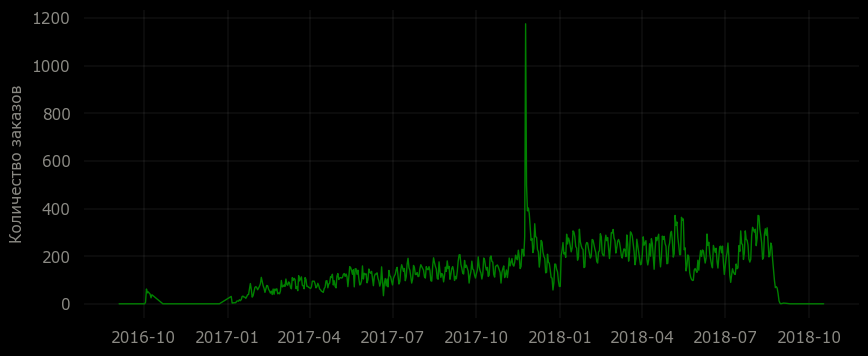

In [27]:
plt.figure(figsize=(10,4))
df_for_plots_orders_cnt = df_for_plots.groupby(df_for_plots.order_purchase_timestamp.dt.date).order_id.count()
sns.lineplot(x = df_for_plots_orders_cnt.index, y = df_for_plots_orders_cnt.values, color='green',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.ylabel("Количество заказов", labelpad = 5, fontsize= 11,color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

plt.show()

какая-то аномалия была 24.11.2017

In [25]:
df_for_plots_orders_cnt.sort_values(ascending = False).head(3)

order_purchase_timestamp
2017-11-24    1176
2017-11-25     499
2017-11-27     403
Name: order_id, dtype: int64

Проверим какие бывают статусы заказов

In [18]:
df_for_plots.groupby('order_status').order_id.count()

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

Глянем графики заказов по разным статусам

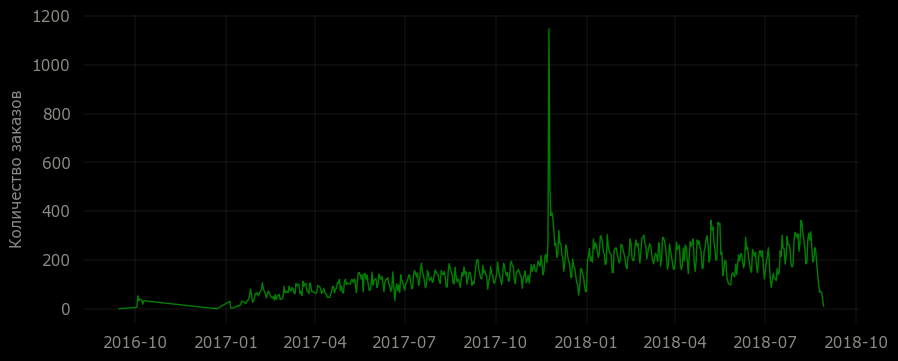

In [28]:
plt.figure(figsize=(10,4))
df_for_plots_orders_delivered = df_for_plots.query("order_status == 'delivered'").groupby(df_for_plots.order_purchase_timestamp.dt.date).order_id.count()
sns.lineplot(x = df_for_plots_orders_delivered.index, y = df_for_plots_orders_delivered.values, color='green',linewidth=1)
plt.tick_params(axis='both', colors='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11,color='#8b8a84')
plt.ylabel("Количество заказов", labelpad = 5, fontsize= 11,color='#8b8a84')
for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1)

plt.show()

График доставленных заказов очень близок к графику созданных заказов. Почти все что было создано - было получено покупателями, то есть, заказы в аномалии реальные

<Figure size 1300x600 with 0 Axes>

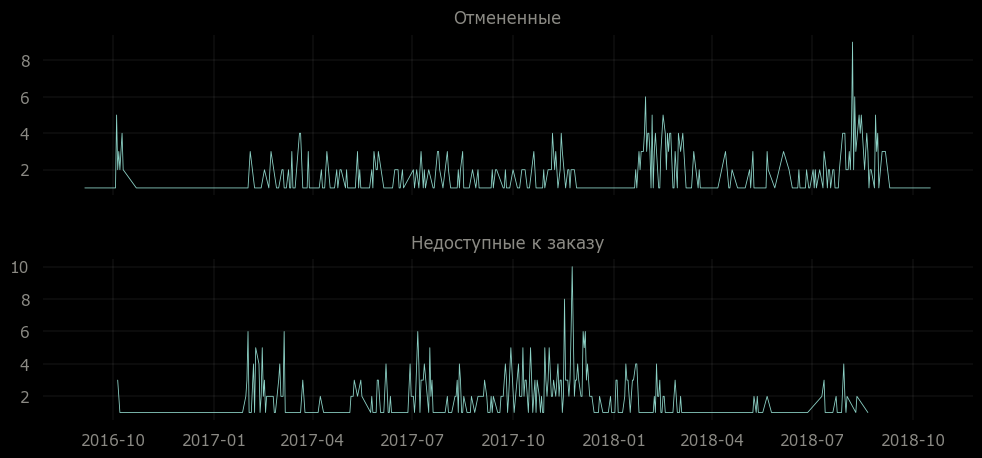

In [35]:
df_for_plots_orders_canceled = df_for_plots.query("order_status == 'canceled'").groupby(df_for_plots.order_purchase_timestamp.dt.date).order_id.count().sort_values()
df_for_plots_orders_unavailable = df_for_plots.query("order_status == 'unavailable'").groupby(df_for_plots.order_purchase_timestamp.dt.date).order_id.count().sort_values()

plt.figure(figsize=(13,6))
fig, ax = plt.subplots(2, 1, sharex=True)
plt.subplots_adjust(wspace= 0.2, 
                    hspace= 0.4)

plt.subplot(2, 1, 1)
sns.lineplot(x = df_for_plots_orders_canceled.index, y = df_for_plots_orders_canceled.values, linewidth=0.6)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Отмененные', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')


for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.subplot(2, 1, 2)
sns.lineplot(x = df_for_plots_orders_unavailable.index, y = df_for_plots_orders_unavailable.values, linewidth=0.6)
plt.tick_params(axis='both', colors='#8b8a84')
plt.title('Недоступные к заказу', fontsize=12, y=1.02,color='#8b8a84')
plt.ylabel("", labelpad = 5, fontsize= 11, color='#8b8a84')
plt.xlabel("", labelpad = 5, fontsize= 11, color='#8b8a84')

for pos in ['right', 'top', 'bottom', 'left']: 
    plt.gca().spines[pos].set_visible(False)
plt.grid(color='darkgray', linestyle='-', linewidth=0.1) 

plt.show()

Отмененные и недоступные заказы распределены более-менее ровно

In [40]:
df_cstms_unq = len(df_customers.groupby('customer_unique_id',as_index = False))
df_cstms_more_than_ones = df_customers.groupby('customer_unique_id',as_index = False)\
                      .agg({'customer_id':'count'})\
                      .sort_values('customer_id', ascending = False)\
                      .query('customer_id > 1')\
                      .customer_id.count()
print(f' Всего покупателей {df_cstms_unq} \n Из них разместили более 1 заказа {df_cstms_more_than_ones}')

 Всего покупателей 96096 
 Из них разместили более 1 заказа 2997


Очень небольшое число покупателей заказы повторно.

In [41]:
df_customers.groupby(['customer_state']).agg({'customer_id' : 'count'}).sort_values('customer_id', ascending = False).head(5)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045


Явно выраженный штат-лидер по числу заказов, а с учетом небольшого числа повторных заказов - и по числу заказчиков.

In [42]:
df_customers.groupby(['customer_state', 'customer_city']).agg({'customer_id' : 'count'}).sort_values('customer_id', ascending = False).head(5)

,,customer_id
customer_state,customer_city,
SP,sao paulo,15540
RJ,rio de janeiro,6882
MG,belo horizonte,2773
DF,brasilia,2131
PR,curitiba,1521


А так же выдающийся город-чемпион

In [43]:
df_items.groupby('seller_id').seller_id.count().sort_values(ascending = False)

seller_id
6560211a19b47992c3666cc44a7e94c0    2033
4a3ca9315b744ce9f8e9374361493884    1987
1f50f920176fa81dab994f9023523100    1931
cc419e0650a3c5ba77189a1882b7556a    1775
da8622b14eb17ae2831f4ac5b9dab84a    1551
                                    ... 
fc4751cfe3b279c419615b9b00c1abb4       1
003554e2dce176b5555353e4f3555ac8       1
001e6ad469a905060d959994f1b41e4f       1
ffcfefa19b08742c5d315f2791395ee5       1
b86a47b3366e3b5424a7b225781f4908       1
Name: seller_id, Length: 3095, dtype: int64

Выраженных лидеров поставщиков нет

In [44]:
df_items.sort_values('price', ascending = False).head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.0,194.31


In [45]:
df_items.sort_values('freight_value', ascending = False).head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.0,409.68


нет ничего дороже 7000 и тяжелее 410

In [49]:
df_items.groupby('order_id').product_id.count().sort_values(ascending = False).head(5)

order_id
8272b63d03f5f79c56e9e4120aec44ef    21
1b15974a0141d54e36626dca3fdc731a    20
ab14fdcfbe524636d65ee38360e22ce8    20
428a2f660dc84138d969ccd69a0ab6d5    15
9ef13efd6949e4573a18964dd1bbe7f5    15
Name: product_id, dtype: int64

Максимальное число позиций в одном заказе - 21 шт
Но самое странное что в таблице нет колнки количество.
Посмотрим внимательно на чемпионский по ассортименту заказ

In [48]:
df_items.loc[df_items.order_id == '8272b63d03f5f79c56e9e4120aec44ef'].groupby('product_id').seller_id.count()

product_id
05b515fdc76e888aada3c6d66c201dff    10
270516a3f41dc035aa87d220228f844c    10
79ce45dbc2ea29b22b5a261bbb7b7ee7     1
Name: seller_id, dtype: int64

Оказывается он состоит всего из трех товаров, а проблема отсутствия колонки с количеством решается по принципу - одна строка - 1 шт

Посмотрим сколько же реально товаров входит в заказы

In [50]:
t = df_items.groupby(['order_id','product_id'],as_index = False)\
        .agg({'seller_id':'count'})\
        .sort_values(['order_id', 'product_id','seller_id'], ascending = True)
t.groupby('order_id', as_index = False)\
 .agg({'seller_id':'count'})\
 .sort_values('seller_id', ascending = False)\
 .rename(columns = {'seller_id':'cnt'})\
 .query('cnt > 1')

,order_id,cnt
77909,ca3625898fbd48669d50701aba51cd5f,8
48309,7d8f5bfd5aff648220374a2df62e84d5,7
46116,77df84f9195be22a4e9cb72ca9e8b4c2,7
66653,ad850e69fce9a512ada84086651a2e7d,7
65312,aa0b425987bdeae4a29c616a2bc3a08a,6
...,...,...
98555,ffb18bf111fa70edf316eb0390427986,2
10392,1ae8a88bf94d02224f932e18297baa64,2
39834,676997dac4c289c241276214efc7839e,2
98575,ffc16cecff8dc037f60458f28d1c1ba5,2


В заказ с самым широким ассортиментов вошло всего 8 позиций.
Заказов содержащих болеее 1 товара - 3236 из около 100 000
Проверим себя, посмотрим на самый ассортиментный заказ

In [51]:
df_items.loc[df_items.order_id == 'ca3625898fbd48669d50701aba51cd5f']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
89007,ca3625898fbd48669d50701aba51cd5f,1,1065e0ebef073787a7bf691924c60eeb,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,309.0,1.84
89008,ca3625898fbd48669d50701aba51cd5f,2,0cf2faf9749f53924cea652a09d8e327,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,33.9,1.84
89009,ca3625898fbd48669d50701aba51cd5f,3,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89010,ca3625898fbd48669d50701aba51cd5f,4,0de59eddc63167215c972b0d785ffa7b,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,159.0,3.67
89011,ca3625898fbd48669d50701aba51cd5f,5,5dae498eff2d80057f56122235a36aff,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89012,ca3625898fbd48669d50701aba51cd5f,6,4a5c3967bfd3629fe07ef4d0cc8c3818,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,109.9,0.15
89013,ca3625898fbd48669d50701aba51cd5f,7,678c229b41c0e497d35a25a8be1cc631,888faa8bfb0b159c37de6d898b961c31,2018-08-17 02:25:07,95.9,0.15
89014,ca3625898fbd48669d50701aba51cd5f,8,21b524c4c060169fa75ccf08c7da4627,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,63.7,0.15
89015,ca3625898fbd48669d50701aba51cd5f,9,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68
89016,ca3625898fbd48669d50701aba51cd5f,10,309dd69eb83cea38c51709d62befe1a4,0b35c634521043bf4b47e21547b99ab5,2018-08-16 02:25:07,56.0,3.68


Похоже, все так и есть. 

Получается, что таблица items содержит построчную раскладку каждого заказа из orders.

А значит мы можем через группировки посчитать сумму по каждому заказу и суммарный вес заказа
Сначала посчитаем суммы для одинаковых товаров в одинаковых заказах

In [55]:
df_sum_and_wght = df_items.groupby(['order_id','product_id'],as_index = False)[['price','freight_value']]\
        .sum()\
        .sort_values('price', ascending = True)
df_sum_and_wght

,order_id,product_id,price,freight_value
79096,c5bdd8ef3c0ec420232e668302179113,8a3254bee785a526d548a81a9bc3c9be,0.85,22.30
44154,6e864b3f0ec71031117ad4cf46b7f2a1,8a3254bee785a526d548a81a9bc3c9be,0.85,18.23
25085,3ee6513ae7ea23bdfab5b9ab60bffcb5,8a3254bee785a526d548a81a9bc3c9be,0.85,18.23
96770,f1d5c2e6867fa93ceee9ef9b34a53cbf,46fce52cef5caa7cc225a5531c946c8b,2.20,7.39
93193,e8bbc1d69fee39eee4c72cb5c969e39d,310dc32058903b6416c71faff132df9e,2.29,7.78
...,...,...,...,...
98056,f5136e38d1a14a4dbd87dff67da82701,1bdf5e6731585cf01aa8169c7028d6ad,6499.00,227.66
102041,fefacc66af859508bf1a7934eab1e97f,69c590f7ffc7bf8db97190b6cb6ed62e,6729.00,193.21
3243,0812eb902a67711a1cb742b3cdaa65ae,489ae2aa008f021502940f251d4cce7f,6735.00,194.31
46140,736e1922ae60d0d6a89247b851902527,19936fa4f614ee0590d3b77ac83fd648,7160.00,114.88


А теперь посчитаем суммы стоимости и веса для всех товаров в одинаковых заказах

In [53]:
df_sum_and_wght = df_sum_and_wght.groupby('order_id', as_index = False)[['price','freight_value']]\
 .sum()\
 .sort_values('price', ascending = True)
df_sum_and_wght

,order_id,price,freight_value
24174,3ee6513ae7ea23bdfab5b9ab60bffcb5,0.85,18.23
42562,6e864b3f0ec71031117ad4cf46b7f2a1,0.85,18.23
93208,f1d5c2e6867fa93ceee9ef9b34a53cbf,2.20,7.39
89758,e8bbc1d69fee39eee4c72cb5c969e39d,2.29,7.78
21805,38bcb524e1c38c2c1b60600a80fc8999,2.90,8.72
...,...,...,...
94439,f5136e38d1a14a4dbd87dff67da82701,6499.00,227.66
98298,fefacc66af859508bf1a7934eab1e97f,6729.00,193.21
3130,0812eb902a67711a1cb742b3cdaa65ae,6735.00,194.31
44467,736e1922ae60d0d6a89247b851902527,7160.00,114.88


Как видим, у нас преобладают легкие и недорогие заказы. При этом графики настолько похожи, что кажется, что цена товара зависит от его веса.